# Happywhale - CNN

Importing Library

In [83]:
# These library are for data manipulation 
import numpy as np
import pandas as pd

# These library are for working with directories
import os
from glob import glob
from tqdm import tqdm

# These library are for Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# These Library are for converting Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# These library are for building model 
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [65]:
# Getting the Files present in the main Directories

path = '/home/jovyan/'
os.listdir(path)

['.ipython',
 'submission.csv',
 'Subsetted OUMVLP-pkl',
 'GaitDatasetB-silh',
 'GaitDatasetB-silh.zip',
 'Videos',
 '.ipynb_checkpoints',
 'Templates',
 '.idlerc',
 '.mozilla',
 '.keras',
 '.ICEauthority',
 '.xsession-errors',
 '.cache',
 '.dbus',
 '.Xauthority',
 'Desktop',
 'core.2527',
 '.vnc',
 'extractor.py',
 'sample_submission.csv',
 'walking_sil.avi',
 'datasets',
 '.gvfs',
 '.python_history',
 '.bash_history',
 'Pictures',
 '.nv',
 'walking.tar.gz',
 'Subsetted OU-MVLP.zip',
 'OpenGait.zip',
 'walking.mp4',
 '.vscode_data',
 'train_images',
 '.bashrc',
 'scratch',
 'dataset-pkl.zip',
 'Subsetted OU-MVLP',
 '.gnupg',
 'model.h5',
 '.jupyter',
 'Documents',
 '.vscode_extensions',
 '.config',
 'dataset-pkl',
 '.kaggle',
 '.thumbnails',
 '.conda',
 'output.mp4',
 'Music',
 'final_train.ipynb',
 'Subsetted OUMVLP-rearranged',
 'kaggle.json',
 'train.csv',
 'Downloads',
 'test_images',
 'happywhale-CNN.ipynb',
 'Public',
 '.local',
 'le.pkl',
 'vscode_projects',
 'OpenGait']

In [66]:
# Loading the Train csv file and Sample Submission File using main dir

train_data = pd.read_csv(path+'train.csv')
samp_subm = pd.read_csv(path+'sample_submission.csv')

In [67]:
# Printing the dimension of the train.csv file

print('Number train samples:', len(train_data))

Number train samples: 51033


In [68]:
# Displaying the column name present in the train.csv file

train_data.columns

Index(['image', 'species', 'individual_id'], dtype='object')

In [69]:
# Displaying the first five in rows in the train.csv file

train_data.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [70]:
# Printing the Number of training images available in the train image directory

print('Number train images:', len(os.listdir(path+'train_images/')))

Number train images: 51033


In [71]:
# Printing the Number of testing images available in the test image directory

print('Number test images:', len(os.listdir(path+'test_images/')))

Number test images: 27956


In [72]:
# Dispalying the different species availabel in the dataset

train_data['species'].value_counts()

bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

# Data Visualization

In [73]:
# Plotting using Pie Chart of the Species

fig = px.pie(train_data, values=train_data['species'].value_counts().values, names=train_data['species'].value_counts().index)
fig.show()

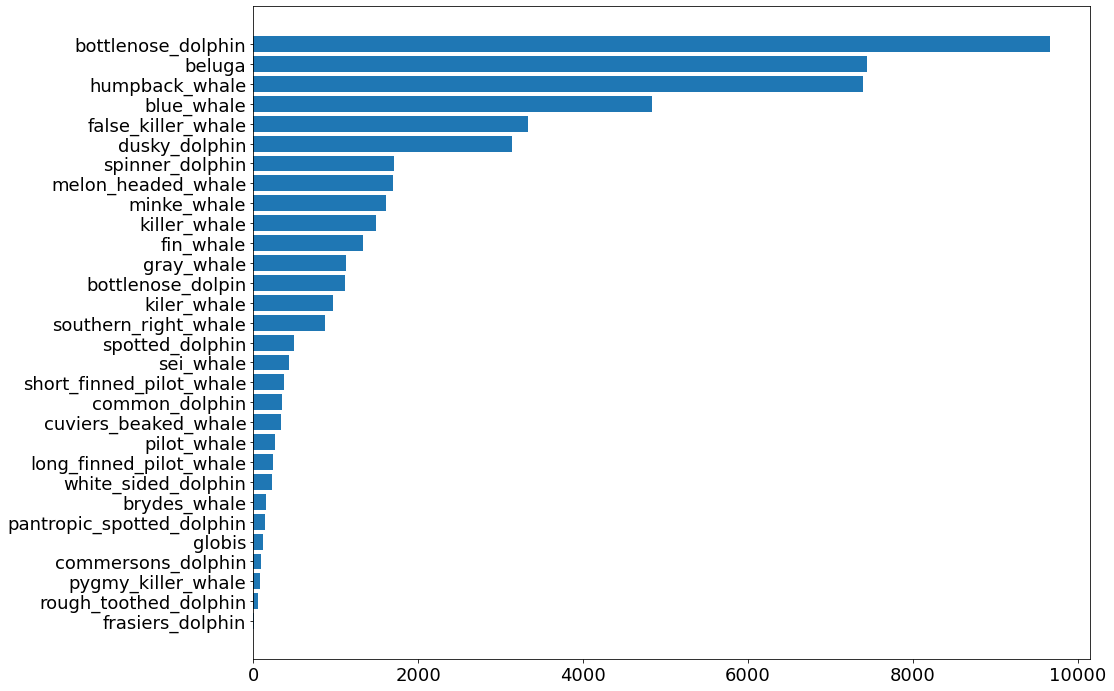

In [74]:
# Plotting BarChart of the Species 

plt.figure(figsize=(15, 12))
plt.rcParams["font.size"] = 18
plt.barh(train_data["species"].value_counts().sort_values(ascending=True).index,
         train_data["species"].value_counts().sort_values(ascending=True),
         tick_label = train_data["species"].value_counts().sort_values(ascending=True).index)
plt.show()

In [75]:
# Displaying the individual id present in the dataset

train_data['individual_id'].value_counts()

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
4012cff65a2c      1
f33b080c773d      1
af6a1c4bdb99      1
d297a5c05384      1
c6c6d60638ac      1
Name: individual_id, Length: 15587, dtype: int64

In [76]:
# Now we will prepare our data for training and also plot few images 

BASE_PATH = "train_images/"
TRAIN_IMAGES = glob(BASE_PATH + "train/*.jpg")

,image,species,individual_id
10684,35d8ac3ec66ffb.jpg,bottlenose_dolphin,46414154efbc


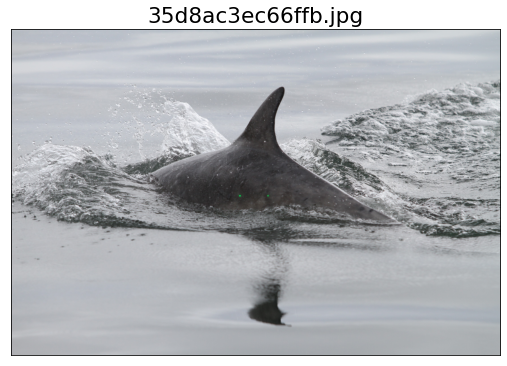

In [77]:
# Displaying Images Randomly for training dataset

path = BASE_PATH + np.random.choice(train_data['image'])
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)
plt.title(path.split("/")[-1])
plt.xticks([]), plt.yticks([])
train_data[train_data['image']==path.split('/')[-1]]


In [78]:
# Storing the Base path and then creating test images for further use

BASE_PATH = "test_images/"
TEST_IMAGES = glob(BASE_PATH + "*.jpg")

Text(0.5, 1.0, '94fdca094a9a00.jpg')

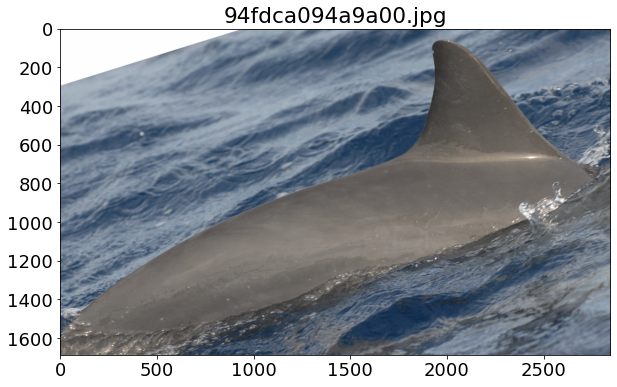

In [79]:
# Displaying images randomly using test data

path = np.random.choice(TEST_IMAGES)
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)
plt.title(path.split("/")[-1])


In [84]:
# creating label in train.csv

train_data['label'] = train_data.species.map(lambda x: 'whale' if 'whale' in x else 'dolphin')

In [97]:
# Barchart of Whale vs Dolphin count

data = train_data['label'].value_counts().reset_index()
fig = px.bar(data, x='index', y='label', color='index', title='Whale Vs Dolphin')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

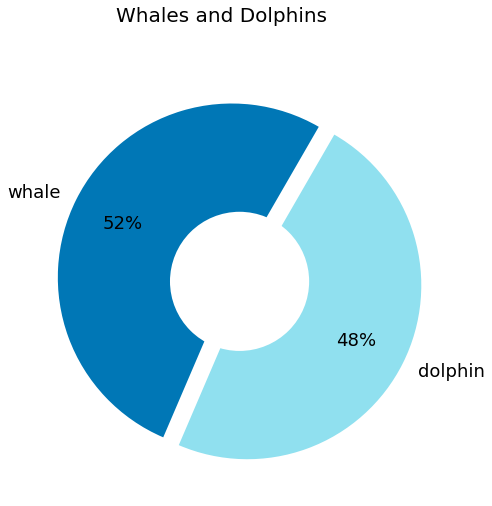

In [99]:
# Plotting proportion of Whales vs Dolphins

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Whales and Dolphins ', size = 20)
explode = (0.05, 0.05)
labels = list(train_data.label.value_counts().index)
sizes = train_data.label.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#0077b6","#90e0ef"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

# CNN Model

Preprocess data

In [23]:
#loading train.csv as train_df

train_df = pd.read_csv("train.csv")

In [24]:
# Printing the dimension of the train_df 

train_df.shape

(51033, 3)

In [25]:
# Displaying First Five column of the train_df

train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [26]:
# checking for null values

train_df.isnull().sum()

image            0
species          0
individual_id    0
dtype: int64

In [27]:
# Removing duplicate values form the train_df of column individual_id

train_df=train_df.drop_duplicates(subset=['individual_id'],keep='last')

In [28]:
# Load Images of certain dimension

def Loading_Images(data, m, dataset):
    print("Loading images")
    X_train = np.zeros((m, 32, 32, 3))
    count = 0
    for fig in tqdm(data['image']):
        img = image.load_img(dataset+"/"+fig, target_size=(32, 32, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        X_train[count] = x
        count += 1
    return X_train

In [29]:
# Convert text categories to numeric values

def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    y = onehot_encoded
    return y, label_encoder

In [30]:
X = Loading_Images(train_df, train_df.shape[0], "train_images")
X /= 255

  0%|          | 3/15587 [00:00<11:36, 22.38it/s]

Loading images


100%|██████████| 15587/15587 [12:38<00:00, 20.55it/s]


In [31]:
y, label_encoder = prepare_labels(train_df['individual_id'])

In [32]:
y.shape

(15587, 15587)

Model using Keras CNN

In [33]:
# Creating Model

model = Sequential()

model.add(Conv2D(32, (6, 6), strides = (1, 1), input_shape = (32, 32, 3)))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides = (1,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.85))

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 32)        3488      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 64)         

In [34]:
# Model fitting 

history = model.fit(X, y, epochs=200, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/200
110/110 [==============================] - 2s 22ms/step - loss: 9.6755 - accuracy: 0.0000e+00 - val_loss: 9.7069 - val_accuracy: 0.0000e+00
Epoch 2/200
110/110 [==============================] - 2s 18ms/step - loss: 9.6484 - accuracy: 0.0000e+00 - val_loss: 9.8009 - val_accuracy: 0.0000e+00
Epoch 3/200
110/110 [==============================] - 2s 18ms/step - loss: 9.6364 - accuracy: 0.0000e+00 - val_loss: 9.8915 - val_accuracy: 0.0000e+00
Epoch 4/200
110/110 [==============================] - 2s 18ms/step - loss: 9.5674 - accuracy: 2.1386e-04 - val_loss: 9.9795 - val_accuracy: 0.0000e+00
Epoch 5/200
110/110 [==============================] - 2s 18ms/step - loss: 9.4001 - accuracy: 9.9800e-04 - val_loss: 10.0902 - val_accuracy: 0.0000e+00
Epoch 6/200
110/110 [==============================] - 2s 18ms/step - loss: 9.1902 - accuracy: 0.0016 - val_loss: 10.1995 - val_accuracy: 0.0000e+00
Epoch 7/200
110/110 [==============================] - 2s 18ms/step - loss: 8.9485 - accur

In [35]:
# saving our model for later use

model.save('model.h5')

# Evaluation of the model 

In [41]:
model.evaluate(X, y = y, batch_size=128, verbose=1)

122/122 [==============================] - 1s 10ms/step - loss: 2.3461 - accuracy: 0.8980


[2.346137523651123, 0.8979918956756592]

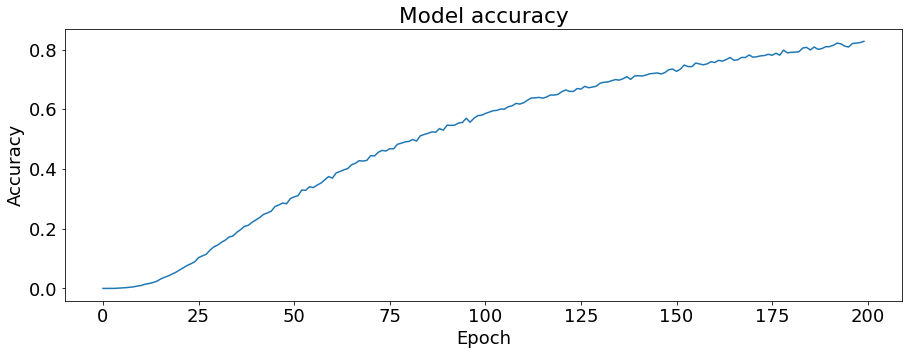

In [39]:
# Plotting the accuracy of the model over the epochs

plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

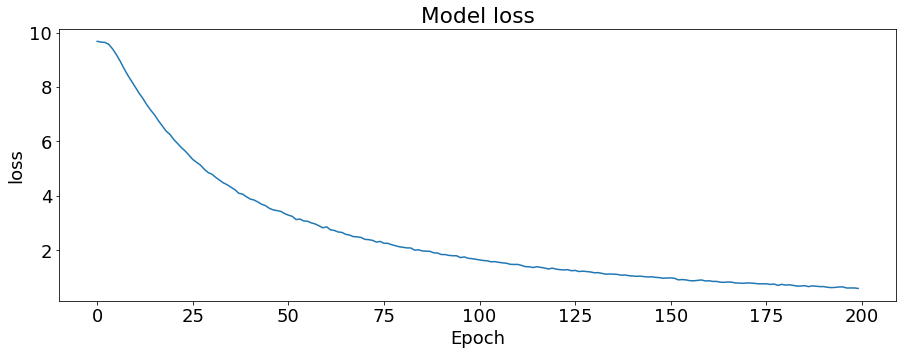

In [40]:
# Plotting the loss of the model over the epochs

plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

# Predictions (Inference)

In [47]:
test = os.listdir("test_images")
print(len(test))

27956


In [48]:
col = ['image']
test_df = pd.DataFrame(test, columns=col)
test_df['predictions'] = ''
#test_df=test_df.head(n=250)


In [49]:
batch_size=5000
batch_start = 0
batch_end = batch_size
L = len(test_df)

while batch_start < L:
    limit = min(batch_end, L)
    test_df_batch = test_df.iloc[batch_start:limit]
    print(type(test_df_batch))
    X = Loading_Images(test_df_batch, test_df_batch.shape[0], "test_images")
    X /= 255
    predictions = model.predict(np.array(X), verbose=1)
    for i, pred in enumerate(predictions):
        p=pred.argsort()[-5:][::-1]
        idx=-1
        s=''
        s1=''
        s2=''
        for x in p:
            idx=idx+1
            #predict rank-2 labels
            if pred[x]>0.6:
                s1 = s1 + ' ' +  label_encoder.inverse_transform(p)[idx]
            else:
                s2 = s2 + ' ' + label_encoder.inverse_transform(p)[idx]
        if s1 == '': 
            s=s2
        else:
            s= s1 + '' + s2 
        s = s.strip(' ')
        test_df.loc[ batch_start + i, 'predictions'] = s
    batch_start += batch_size   
    batch_end += batch_size
    

  0%|          | 2/5000 [00:00<06:09, 13.53it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 5000/5000 [05:33<00:00, 14.99it/s]


157/157 [==============================] - 1s 3ms/step


  0%|          | 2/5000 [00:00<06:32, 12.72it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 5000/5000 [05:38<00:00, 14.79it/s]


157/157 [==============================] - 0s 3ms/step


  0%|          | 1/5000 [00:00<09:29,  8.78it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 5000/5000 [05:31<00:00, 15.09it/s]


157/157 [==============================] - 0s 3ms/step


  0%|          | 1/5000 [00:00<08:57,  9.31it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 5000/5000 [05:33<00:00, 14.99it/s]


157/157 [==============================] - 0s 3ms/step


  0%|          | 2/5000 [00:00<06:50, 12.18it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 5000/5000 [05:34<00:00, 14.94it/s]


157/157 [==============================] - 0s 3ms/step


  0%|          | 0/2956 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Loading images


100%|██████████| 2956/2956 [03:19<00:00, 14.78it/s]


93/93 [==============================] - 0s 3ms/step


Update submission.csv

In [53]:
# Creating submission.csv and printing first five rows

test_df.to_csv('submission.csv',index=False)
test_df.head()

,image,predictions,first_pred,other_pred
0,8fe4f9f92696be.jpg,fc7cea2cdd5d c9a375dfb3ff dbc011f7ac07 d9f4488...,fc7cea2cdd5d,c9a375dfb3ff dbc011f7ac07 d9f4488649b1 48f6b97...
1,f7ce93fed9c98d.jpg,7e8c12a6146f 40adfc38c84d 422ca208b6e0 6888bb6...,7e8c12a6146f,40adfc38c84d 422ca208b6e0 6888bb60d89a e73e92c...
2,bfffc0099d4740.jpg,8d5c0821a054 6f2e2f95ab64 a2a18351dea0 de40be7...,8d5c0821a054,6f2e2f95ab64 a2a18351dea0 de40be7be617 2f4d49d...
3,e315cd06ccee9c.jpg,ff1c39ff544a f5db0fd28c0b 9c47f2f8135d 4c5fa10...,ff1c39ff544a,f5db0fd28c0b 9c47f2f8135d 4c5fa102597e ae0cb95...
4,aa84bdfac4cabc.jpg,6e2187299b74 382000249e07 8e52830261d2 427441a...,6e2187299b74,382000249e07 8e52830261d2 427441af1830 ca39d86...


In [55]:
test_df[['first_pred', 'other_pred']] = test_df['predictions'].str.split(' ', 1, expand=True)
test_df = test_df = test_df.drop('predictions', 1)
test_df.head()

,image,first_pred,other_pred
0,8fe4f9f92696be.jpg,fc7cea2cdd5d,c9a375dfb3ff dbc011f7ac07 d9f4488649b1 48f6b97...
1,f7ce93fed9c98d.jpg,7e8c12a6146f,40adfc38c84d 422ca208b6e0 6888bb60d89a e73e92c...
2,bfffc0099d4740.jpg,8d5c0821a054,6f2e2f95ab64 a2a18351dea0 de40be7be617 2f4d49d...
3,e315cd06ccee9c.jpg,ff1c39ff544a,f5db0fd28c0b 9c47f2f8135d 4c5fa102597e ae0cb95...
4,aa84bdfac4cabc.jpg,6e2187299b74,382000249e07 8e52830261d2 427441af1830 ca39d86...
